# Importing Libraries

In [74]:
# Importing necessary libraries and setting Seaborn Styles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Garamond')
sns.set_style('darkgrid')
plt.rc('font', family='Garamond', size=12, weight='normal')

# Reading Data

In [75]:
#Reading data from CSV file and viewing top 3 rows
movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


# Understanding the Data

In [76]:
# Viewing the shape of our data to get the row and column count
movies.shape

(16638, 17)

In [77]:
# Getting detailed information out our columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [78]:
# Getting a statistical view 
movies.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


# Data Cleaning

In [79]:
#Converting date columns into datetime dtype
new_movies = movies.astype({'in_theaters_date':'datetime64[ns]', 'on_streaming_date':'datetime64[ns]'})
new_movies.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0


In [80]:
# Handling missing data in numeric columns
new_movies.audience_count.fillna(new_movies.audience_count.median(), inplace=True)
new_movies.audience_rating.fillna(new_movies.audience_rating.mean(), inplace=True)
new_movies.runtime_in_minutes.fillna(new_movies.runtime_in_minutes.median(), inplace=True)
new_movies.shape

(16638, 17)

In [81]:
#Viewing duplicated rows
new_movies[new_movies.duplicated(keep=False)]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
8495,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0,65.0
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0,65.0


In [82]:
# Handling duplicated rows
new_movies_df = new_movies[~new_movies.duplicated()]
new_movies_df.shape

(16637, 17)

In [83]:
#Value counts for the rating column
new_movies_df.rating.value_counts(dropna=False)

rating
R         6136
NR        4861
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64

In [ ]:
#Handling typos in ratings column
condition = [new_movies_df.rating=='R)', new_movies_df.rating=='PG-13)']
choice = ['R', 'PG-13']
new_movies_df['rating'] = np.select(condition, choice, default=new_movies_df.rating)

In [85]:
new_movies_df.rating.value_counts(dropna=False)

rating
R        6137
NR       4861
PG-13    2888
PG       2062
G         652
NC17       37
Name: count, dtype: int64

In [86]:
# working with a subset of the data -  specific columns
movies_df = new_movies_df[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies_df.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


# Exploring the Data

In [87]:
# Total number of Movies in the Dataset
movies_df.movie_title.count()

16637

In [88]:
#Filtering the data to only include movies that came out in 2010 or later
movies_2010_upwards=movies_df.loc[movies_df.in_theaters_date.dt.year>=2010]

In [89]:
# Total number of movies that came out in 2010 or later
movies_2010_upwards.movie_title.count()

6052

In [90]:
# Top Five highest rated movies based on tomatometer_rating
movies_2010_upwards.sort_values(by='tomatometer_rating',ascending=False).head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
9207,Louder Than A Bomb,NR,"Documentary, Special Interest",2011-05-18,100.0,100,26,81.0,1684.0
8515,Kingdom of Us,NR,Documentary,2017-10-13,110.0,100,8,83.0,115.0
11796,Rewind This!,NR,"Documentary, Special Interest, Television",2013-03-01,90.0,100,21,74.0,379.0
11642,Recovery Boys,NR,Documentary,2018-06-29,99.0,100,11,81.0,140.0
11634,Rebels of the Neon God,NR,"Art House & International, Drama",2015-04-10,106.0,100,32,76.0,721.0


In [91]:
# Top Five highest rated movies based on audience_rating
movies_2010_upwards.sort_values(by='audience_rating',ascending=False).head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
12579,Sin Alas,NR,"Art House & International, Drama",2015-06-11,90.0,64,11,100.0,50.0
4027,Calling All Earthlings,NR,Documentary,2018-06-29,74.0,58,12,100.0,34.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
12960,Sprinter,NR,Drama,2019-04-24,112.0,78,9,100.0,7.0


# Finding most popular movies with 100k+ audience count

In [92]:
# most popular movies based on audience count - 100k+
popular_movies = movies_2010_upwards[movies_2010_upwards['audience_count']>100000]
popular_movies.shape

(316, 9)

In [93]:
# Top Five highest rated popular movies based on tomatometer_rating
popular_movies.sort_values(by='tomatometer_rating', ascending=False).head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0


In [94]:
# Top Five highest rated popular movies based on audience_rating
popular_movies.sort_values(by='audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0


In [95]:
# Total number of movies under each rating type
popular_movies['rating'].value_counts(dropna=False)

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

In [96]:
# Average audience rating of movies under each rating type
round(popular_movies.groupby('rating')['audience_rating'].agg('mean'),2).sort_values(ascending=False)

rating
PG-13    67.29
PG       66.82
G        66.20
R        63.01
Name: audience_rating, dtype: float64

# Create New Columns

In [97]:
#Creating new columns using np.where()
popular_movies = popular_movies.assign(Animation=np.where(popular_movies['genre'].str.lower().str.contains('animation'), 1, 0))
popular_movies['Action and Adventure'] = np.where(popular_movies['genre'].str.lower().str.contains('action|adventure',regex=1), 1, 0)
popular_movies = popular_movies.assign(Comedy=np.where(popular_movies['genre'].str.lower().str.contains('comedy'), 1, 0))
popular_movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action and Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,0,1,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0


In [98]:
# Pivoting data to gather insights
popular_movies.groupby(['rating'])[['Animation', 'Action and Adventure', 'Comedy']].agg('sum')

#Insights

#PG-13 rating  is the highest and common in Action & Adventure and commedies
#G rating is lowest and common in comedies and Animation movies
#PG rating is most uniform in all genres
#Action & Adventure movies have the highest PG-13 and R rating.

,Animation,Action and Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


In [99]:
# Avg rating shows that the general audience love animated movies
popular_movies.groupby(['Animation']).agg({'tomatometer_rating':'mean', 'audience_rating':'mean'})

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [100]:
# # Avg rating shows that the general audience likes action movies more than critics
popular_movies.groupby(['Action and Adventure']).agg({'tomatometer_rating':'mean', 'audience_rating':'mean'})

,tomatometer_rating,audience_rating
Action and Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [101]:
# comedies have lower ratings than other genres
popular_movies.groupby(['Comedy']).agg({'tomatometer_rating':'mean', 'audience_rating':'mean'})

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


# Visualize the Data for further analysis

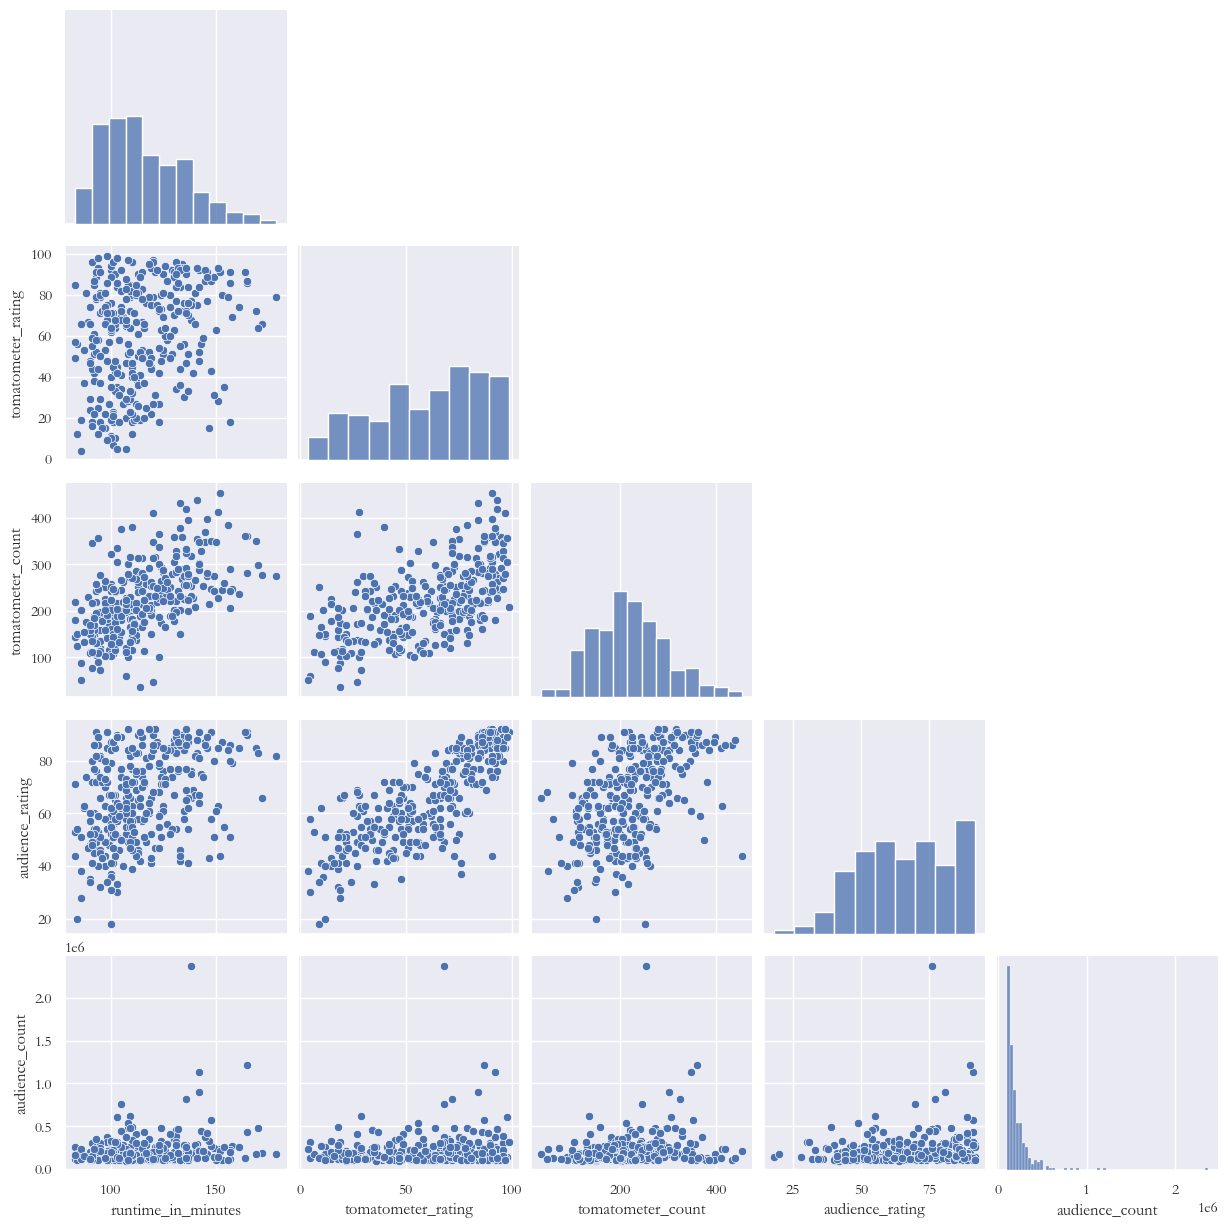

In [102]:
# Pair plots to understand relationships and distribution
sns.pairplot(popular_movies.iloc[:, :-3], corner=True);

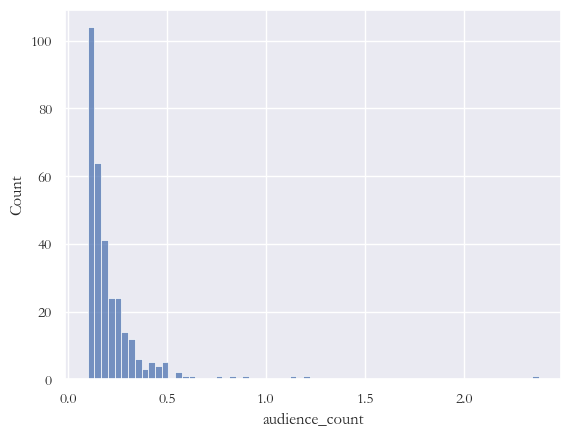

In [103]:
# Audience count data is left skewed and has some outliers
sns.histplot(data=popular_movies['audience_count']/1000000);

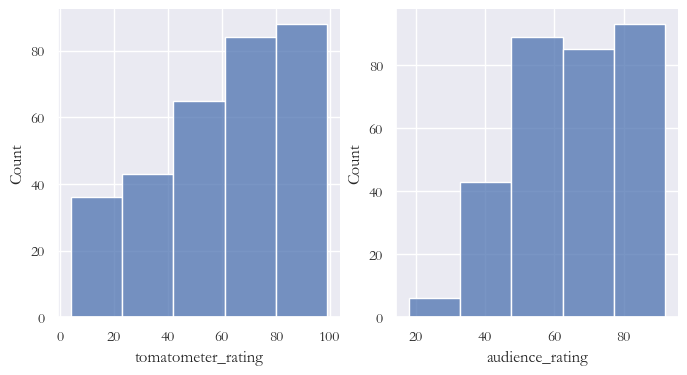

In [104]:
# There is quite a high number of low critic ratings (0-40 rating) compared to audience rating
fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.histplot(popular_movies['tomatometer_rating'],ax=ax[0], bins=5)
sns.histplot(popular_movies['audience_rating'],ax=ax[1], bins=5)

sns.despine();

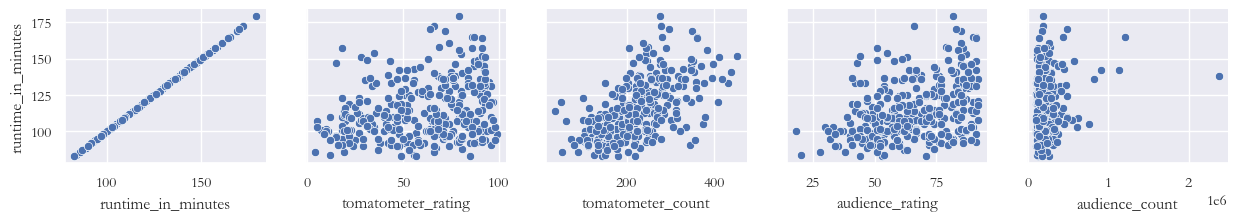

In [105]:
# weak correlation between runtime in minutes and critic/tomatometer rating
cols = popular_movies.iloc[:, 4:-3].columns
datas=popular_movies.iloc[:, 4:-3]

fig, ax = plt.subplots(1,5, figsize=(15,2), sharey=True)
for i in range(5):
    sns.scatterplot(data=datas, x=cols[i], y=cols[0], ax=ax[i])

sns.despine()

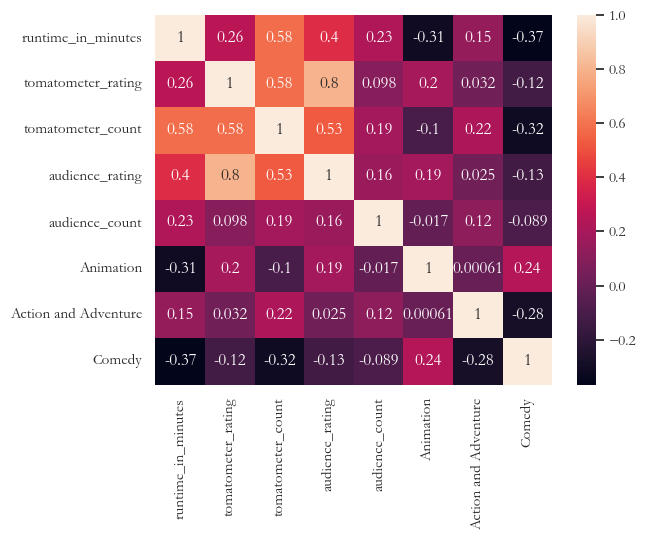

In [106]:
#Visualizing Correllation with a heat map
sns.heatmap(data=popular_movies.corr(numeric_only=True), annot=popular_movies.corr(numeric_only=True));

In [107]:
# Finding the most popular movie by audience count
mask = (popular_movies.audience_count==popular_movies.audience_count.max())
popular_movies.loc[mask]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action and Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,1,0
